<a href="https://colab.research.google.com/github/sergioperes20/Analytics-Projects-/blob/main/Exploration_Visualization_Prediction%20for_%20Eletric_Vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Mount Google Drive if your file is stored there
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
#Load data

file_path = '/content/drive/MyDrive/Electric_Vehicle_Population_Data (1).csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)


In [4]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159467 entries, 0 to 159466
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         159467 non-null  object 
 1   County                                             159463 non-null  object 
 2   City                                               159463 non-null  object 
 3   State                                              159467 non-null  object 
 4   Postal Code                                        159463 non-null  float64
 5   Model Year                                         159467 non-null  int64  
 6   Make                                               159467 non-null  object 
 7   Model                                              159467 non-null  object 
 8   Electric Vehicle Type                              159467 non-null  object

In [5]:
#Data Exploration
# Display the first few rows of the DataFrame to inspect the data
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [6]:
df.describe

<bound method NDFrame.describe of         VIN (1-10)    County               City State  Postal Code  \
0       2C4RC1N71H    Kitsap          Bremerton    WA      98311.0   
1       2C4RC1N7XL   Stevens           Colville    WA      99114.0   
2       KNDC3DLCXN    Yakima             Yakima    WA      98908.0   
3       5YJ3E1EA0J    Kitsap  Bainbridge Island    WA      98110.0   
4       1N4AZ1CP7J  Thurston           Tumwater    WA      98501.0   
...            ...       ...                ...   ...          ...   
159462  KM8JBDA2XP  Skamania          Underwood    WA      98651.0   
159463  1G1FZ6S02M    Skagit                Bow    WA      98232.0   
159464  YV4H60CX2P      King          Sammamish    WA      98029.0   
159465  5YJ3E1EA7K   Whatcom         Bellingham    WA      98225.0   
159466  7SAYGDEF6N    Island      Camano Island    WA      98282.0   

        Model Year       Make     Model  \
0             2017   CHRYSLER  PACIFICA   
1             2020   CHRYSLER  PACIFICA

In [7]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 361
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [8]:
df.shape

(159467, 17)

In [9]:
#DATA CLEANING
# Drop rows with null values
df_cleaned = df.dropna()

In [10]:
print(df_cleaned.isna().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


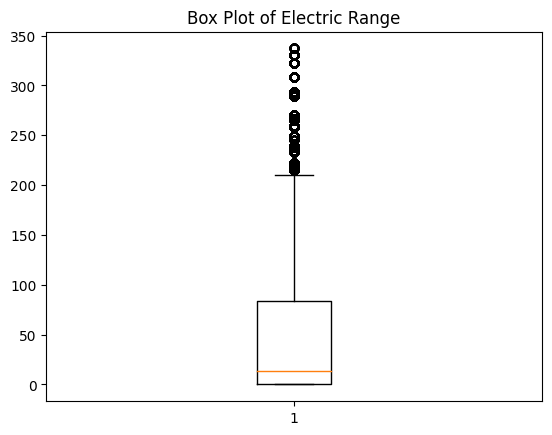

In [11]:
#Identifying outliers
# Check the distribution of 'Electric Range' using a box plot
plt.boxplot(df['Electric Range'])
plt.title('Box Plot of Electric Range')
plt.show()
# The box plot indicates that the majority of 'Electric Range' values fall within the range of 0 to 350.

Make Counts in Cleaned DataFrame:
TESLA                   72274
NISSAN                  13780
CHEVROLET               12542
FORD                     7988
BMW                      6828
KIA                      6741
TOYOTA                   5505
VOLKSWAGEN               4415
VOLVO                    3737
JEEP                     3679
HYUNDAI                  3664
AUDI                     3237
RIVIAN                   2930
CHRYSLER                 2844
MERCEDES-BENZ            1188
PORSCHE                  1064
MITSUBISHI                910
HONDA                     831
MINI                      821
POLESTAR                  803
FIAT                      795
SUBARU                    689
SMART                     276
MAZDA                     269
LINCOLN                   235
JAGUAR                    220
LUCID                     208
LEXUS                     201
CADILLAC                  196
GENESIS                   129
LAND ROVER                 47
ALFA ROMEO                 19
FISKER

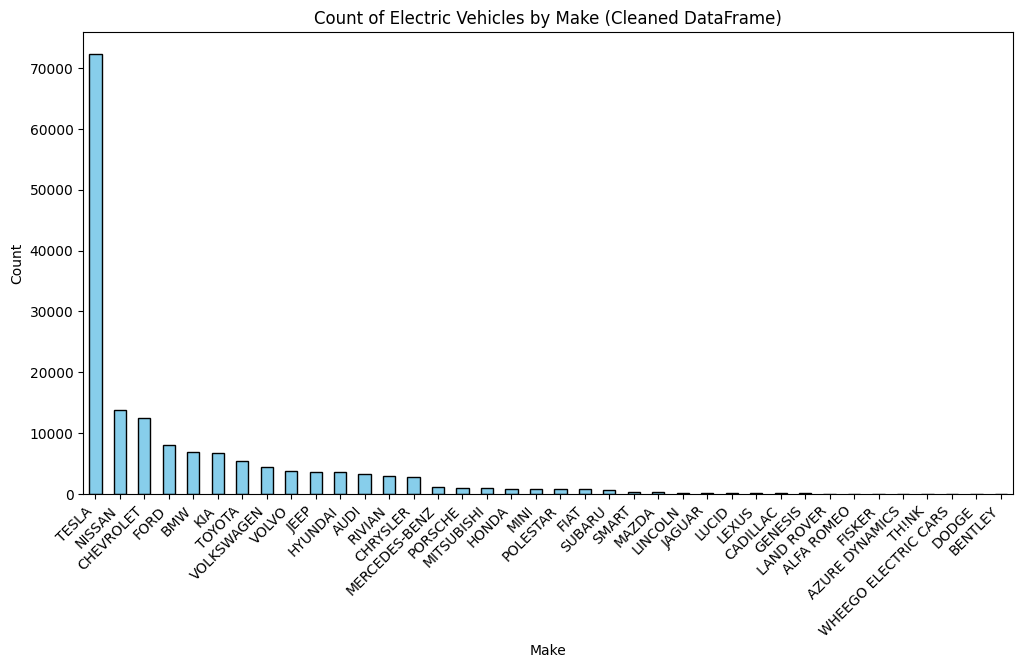

In [12]:
#DATA EXPLORATION AND DATA VISUALIZATION

# Explore the 'Make' column and count the occurrences of each make in the cleaned DataFrame
make_counts_cleaned = df_cleaned['Make'].value_counts()

# Display the counts
print("Make Counts in Cleaned DataFrame:")
print(make_counts_cleaned)

# Plot a bar chart for better visualization
plt.figure(figsize=(12, 6))
make_counts_cleaned.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Count of Electric Vehicles by Make (Cleaned DataFrame)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [13]:
# Install plotly if not already installed
!pip install plotly

# Import necessary libraries
import plotly.express as px
import pandas as pd

# Section 6: Data Exploration

# Explore the 'Make' column and count the occurrences of each make in the cleaned DataFrame
make_counts_cleaned = df_cleaned['Make'].value_counts()

# Display the counts
print("Make Counts in Cleaned DataFrame:")
print(make_counts_cleaned)

# Filter top makes for better visualization (you can adjust the number)
top_makes = make_counts_cleaned.head(10)

# Create a DataFrame for the treemap
treemap_data = pd.DataFrame({'id': top_makes.index, 'parent': 'Electric Vehicles', 'value': top_makes.values, 'text': top_makes.index, 'count': top_makes.values})

# Create a tree map using plotly express with callout values
fig = px.treemap(treemap_data, names='id', parents='parent', values='value', custom_data=['text', 'count'], title='Top 10 Electric Vehicle Makes with Callout Values')

# Update the layout to display the callout values
fig.update_traces(textinfo='label+text', hoverinfo='label+value+text')

fig.show()




Make Counts in Cleaned DataFrame:
TESLA                   72274
NISSAN                  13780
CHEVROLET               12542
FORD                     7988
BMW                      6828
KIA                      6741
TOYOTA                   5505
VOLKSWAGEN               4415
VOLVO                    3737
JEEP                     3679
HYUNDAI                  3664
AUDI                     3237
RIVIAN                   2930
CHRYSLER                 2844
MERCEDES-BENZ            1188
PORSCHE                  1064
MITSUBISHI                910
HONDA                     831
MINI                      821
POLESTAR                  803
FIAT                      795
SUBARU                    689
SMART                     276
MAZDA                     269
LINCOLN                   235
JAGUAR                    220
LUCID                     208
LEXUS                     201
CADILLAC                  196
GENESIS                   129
LAND ROVER                 47
ALFA ROMEO                 19
FISKER

City Counts in Cleaned DataFrame:
Seattle           26932
Bellevue           8075
Redmond            5796
Vancouver          5599
Bothell            5176
                  ...  
Ione                  1
Walla Walla Co        1
Latah                 1
Lebam                 1
Malott                1
Name: City, Length: 464, dtype: int64


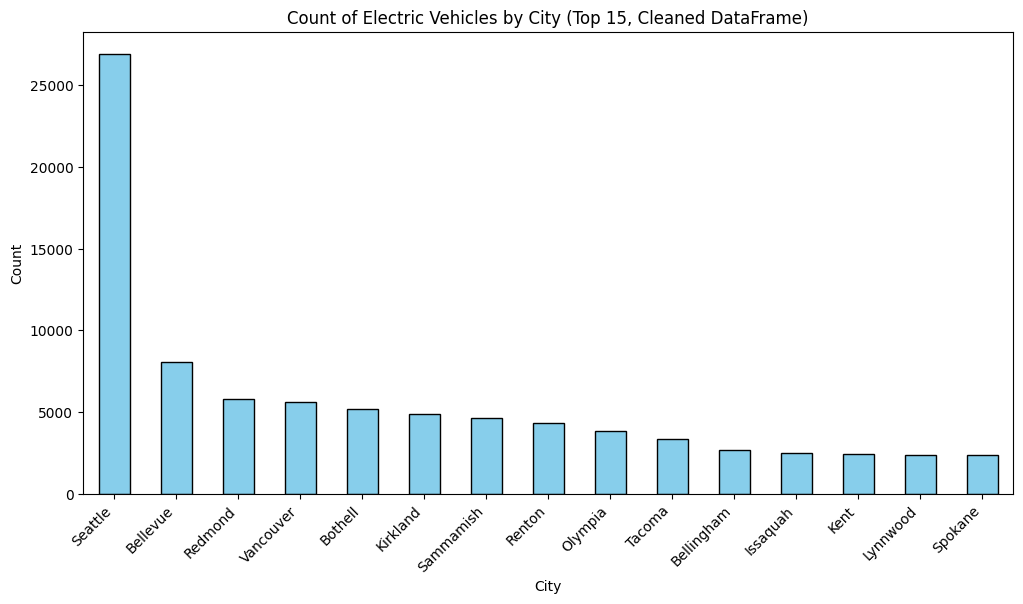

In [14]:
# Explore the 'City' column and count the occurrences of each city in the cleaned DataFrame
city_counts_cleaned = df_cleaned['City'].value_counts()

# Display the counts
print("City Counts in Cleaned DataFrame:")
print(city_counts_cleaned)

# Plot a bar chart for city counts
plt.figure(figsize=(12, 6))
city_counts_cleaned.head(15).plot(kind='bar', color='skyblue', edgecolor='black')  # Displaying top 15 cities for better readability
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of Electric Vehicles by City (Top 15, Cleaned DataFrame)')
plt.xticks(rotation=45, ha='right')
plt.show()



State Counts in Cleaned DataFrame:
WA    159101
Name: State, dtype: int64


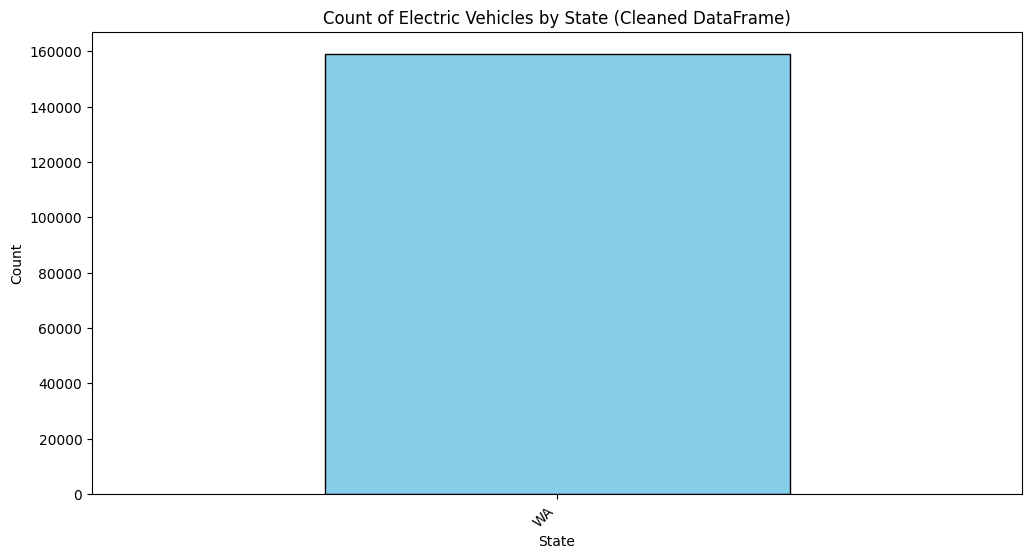

In [15]:
# Explore the 'State' column and count the occurrences of each state in the cleaned DataFrame
state_counts_cleaned = df_cleaned['State'].value_counts()

# Display the counts
print("State Counts in Cleaned DataFrame:")
print(state_counts_cleaned)

# Plot a bar chart for state counts
plt.figure(figsize=(12, 6))
state_counts_cleaned.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Electric Vehicles by State (Cleaned DataFrame)')
plt.xticks(rotation=45, ha='right')
plt.show()




Model Year Counts in Cleaned DataFrame:
2023    45205
2022    27609
2021    18662
2018    14294
2020    11366
2019    10707
2017     8549
2016     5586
2015     4880
2013     4504
2014     3547
2024     1712
2012     1641
2011      779
2010       24
2008       20
2000        8
1999        3
2002        2
1998        1
1997        1
2003        1
Name: Model Year, dtype: int64


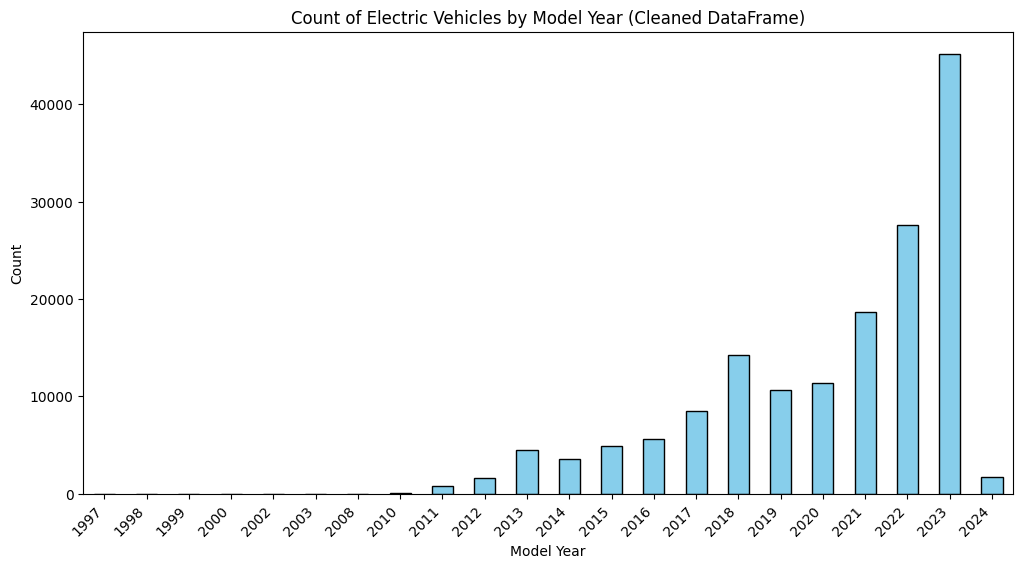

In [16]:
# Explore the 'Model Year' column and count the occurrences of each year in the cleaned DataFrame
model_year_counts_cleaned = df_cleaned['Model Year'].value_counts()

# Display the counts
print("Model Year Counts in Cleaned DataFrame:")
print(model_year_counts_cleaned)

# Plot a bar chart for model year counts
plt.figure(figsize=(12, 6))
model_year_counts_cleaned.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')  # Sorting by index (year)
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Count of Electric Vehicles by Model Year (Cleaned DataFrame)')
plt.xticks(rotation=45, ha='right')
plt.show()

Electric Vehicle Type Counts in Cleaned DataFrame:
Battery Electric Vehicle (BEV)            123913
Plug-in Hybrid Electric Vehicle (PHEV)     35188
Name: Electric Vehicle Type, dtype: int64


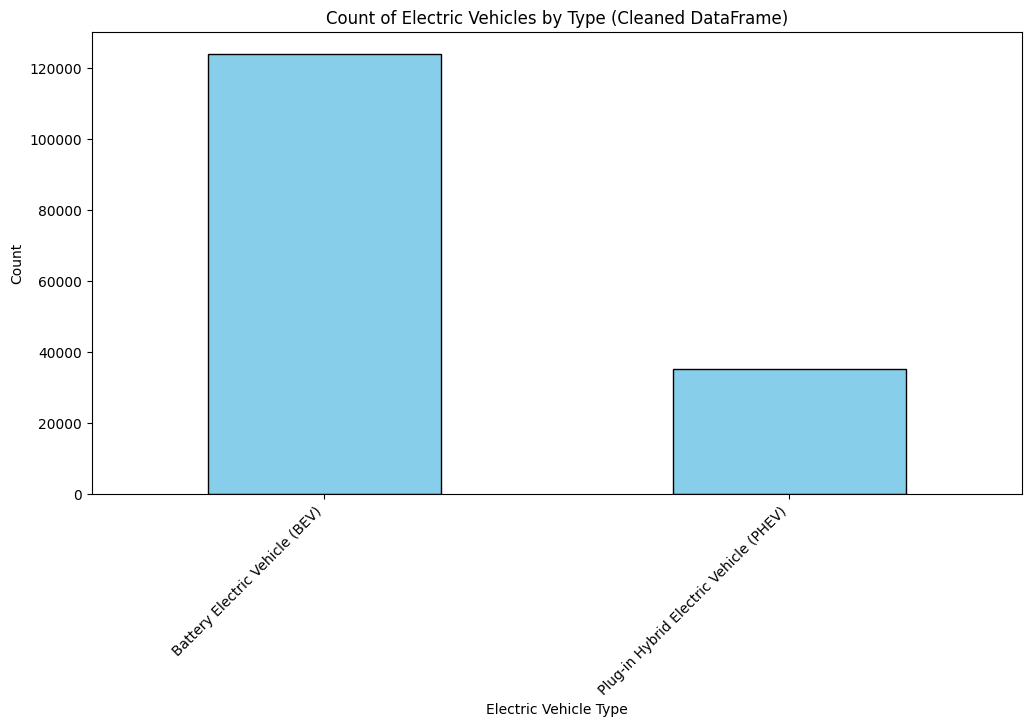

In [17]:


# Explore the 'Electric Vehicle Type' column and count the occurrences of each type in the cleaned DataFrame
ev_type_counts_cleaned = df_cleaned['Electric Vehicle Type'].value_counts()

# Display the counts
print("Electric Vehicle Type Counts in Cleaned DataFrame:")
print(ev_type_counts_cleaned)

# Plot a bar chart for electric vehicle type counts
plt.figure(figsize=(12, 6))
ev_type_counts_cleaned.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.title('Count of Electric Vehicles by Type (Cleaned DataFrame)')
plt.xticks(rotation=45, ha='right')
plt.show()


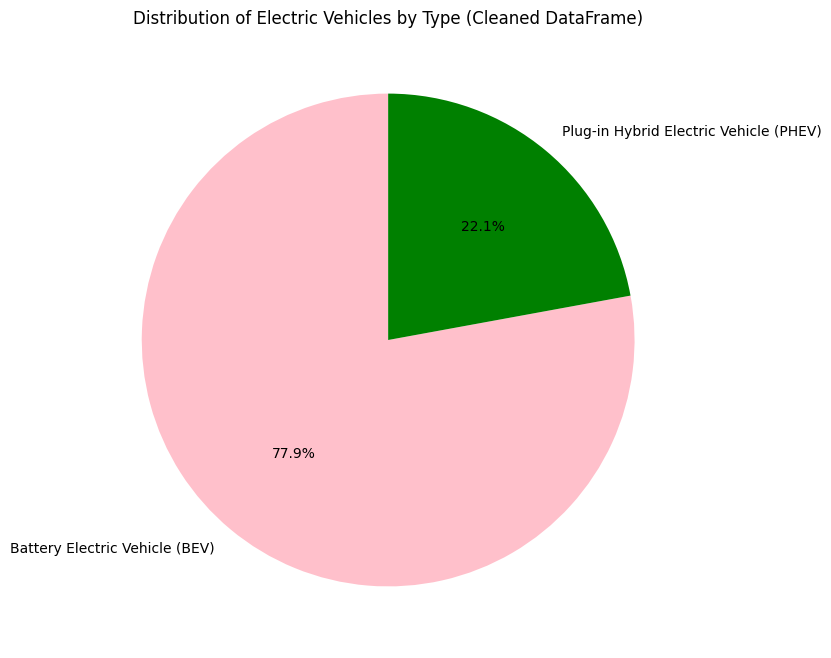

In [26]:
#Pie Chart

# Plot a pie chart for electric vehicle type counts
plt.figure(figsize=(8, 8))
plt.pie(ev_type_counts_cleaned, labels=ev_type_counts_cleaned.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'green', 'lightcoral'])
plt.title('Distribution of Electric Vehicles by Type (Cleaned DataFrame)')
plt.show()


Model Counts in Cleaned DataFrame:
MODEL Y        30790
MODEL 3        28505
LEAF           13296
MODEL S         7626
BOLT EV         6104
               ...  
FLYING SPUR        1
918                1
OCEAN              1
S-10 PICKUP        1
BENTAYGA           1
Name: Model, Length: 130, dtype: int64


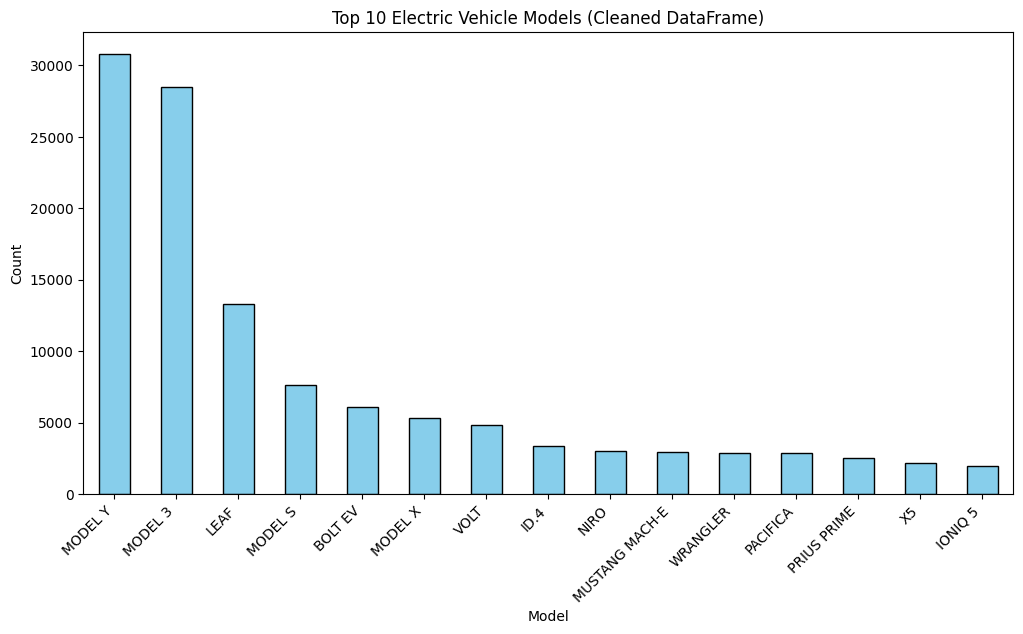

In [27]:


# Explore the 'Model' column and count the occurrences of each model in the cleaned DataFrame
model_counts_cleaned = df_cleaned['Model'].value_counts()

# Display the counts
print("Model Counts in Cleaned DataFrame:")
print(model_counts_cleaned)

# Plot a bar chart for the top 15 models
plt.figure(figsize=(12, 6))
model_counts_cleaned.head(15).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 10 Electric Vehicle Models (Cleaned DataFrame)')
plt.xticks(rotation=45, ha='right')
plt.show()


Electric Range by Model:
Model
330E    17.811060
500     85.615094
530E    15.961165
740E    14.000000
745E    16.000000
          ...    
X3      17.000000
X5      27.133576
XC40     0.000000
XC60    24.419816
XC90    22.552995
Name: Electric Range, Length: 130, dtype: float64


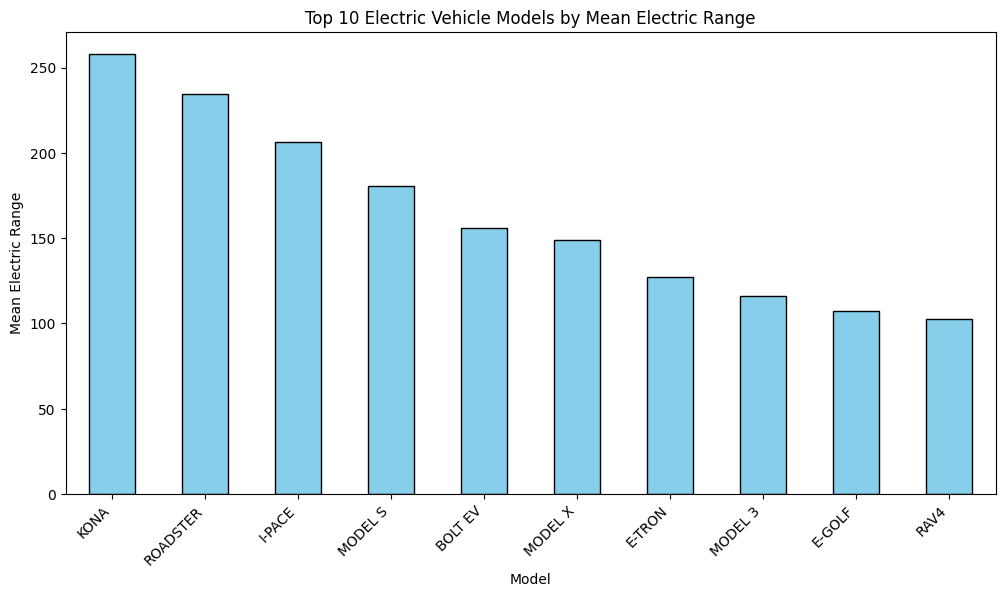

In [28]:

# Group by 'Model' and calculate the mean electric range for each model
electric_range_by_model = df_cleaned.groupby('Model')['Electric Range'].mean()

# Display the mean electric range by model
print("Electric Range by Model:")
print(electric_range_by_model)

# Plot a bar chart for electric range by model
plt.figure(figsize=(12, 6))
electric_range_by_model.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Model')
plt.ylabel('Mean Electric Range')
plt.title('Top 10 Electric Vehicle Models by Mean Electric Range')
plt.xticks(rotation=45, ha='right')
plt.show()


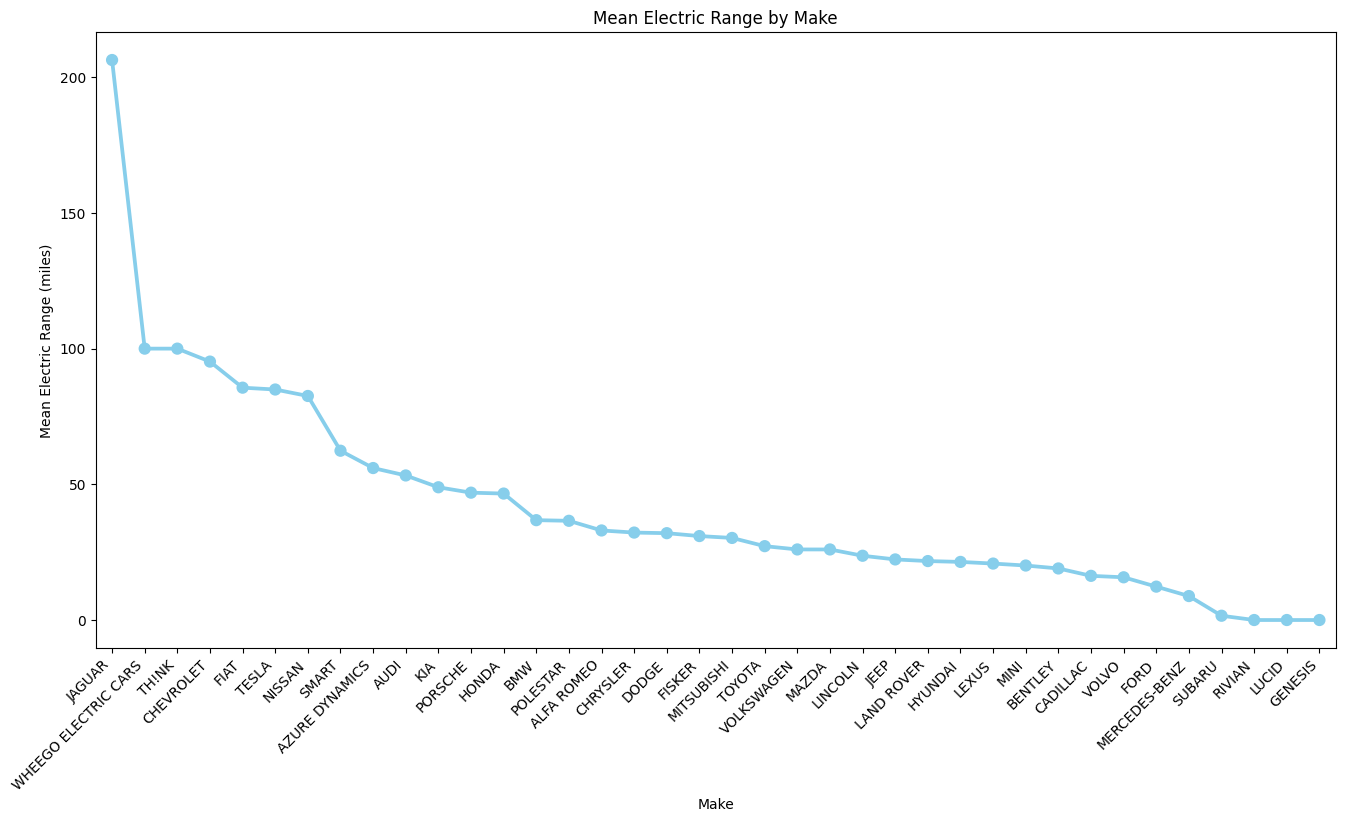

In [29]:
# Section 6: Data Exploration

# Calculate the mean electric range for each make
mean_electric_range_by_make = df_cleaned.groupby('Make')['Electric Range'].mean().sort_values(ascending=False)

# Create a point plot for mean electric range by make
plt.figure(figsize=(16, 8))
sns.pointplot(x=mean_electric_range_by_make.index, y=mean_electric_range_by_make.values, color='skyblue')
plt.xlabel('Make')
plt.ylabel('Mean Electric Range (miles)')
plt.title('Mean Electric Range by Make')
plt.xticks(rotation=45, ha='right')
plt.show()



In [30]:
# Section 7: Machine Learning with scikit-learn

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select features and target variable
features = ['Model Year', 'Make', 'Electric Vehicle Type', 'Base MSRP']
target = 'Electric Range'

# Create feature matrix (X) and target vector (y)
X = df_cleaned[features]
y = df_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['Model Year', 'Base MSRP']
categorical_features = ['Make', 'Electric Vehicle Type']

numeric_transformer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 5767.721204465047


In [31]:
# import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [32]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

In [33]:
# # Now we can use the trained model (pipeline) to make predictions on new data
# For example:
new_data = pd.DataFrame({
    'Electric Vehicle Type': ['Battery Electric Vehicle'],
    'Model': ['Tesla Model S'],
    'Make': ['Tesla'],
    'Model Year': [2022],
    'Base MSRP' : [0]
    })

prediction_new_data = pipeline.predict(new_data)
print(f'Predicted Electric Range for New Data: {prediction_new_data}')

Predicted Electric Range for New Data: [12.57633529]


In [34]:
new_data = pd.DataFrame({
    'Electric Vehicle Type': ['Plug-in Hybrid Electric Vehicle (PHEV)'],
    'Model': ['PACIFICA'],
    'Make': ['CHRYSLER'],
    'Model Year': [2017],
    'Base MSRP' : [0]
    })

prediction_new_data = pipeline.predict(new_data)
print(f'Predicted Electric Range for New Data: {prediction_new_data}')

Predicted Electric Range for New Data: [33.]


In [35]:
new_data = pd.DataFrame({
    'Electric Vehicle Type': ['Battery Electric Vehicle (BEV)'],
    'Model': ['LEAF'],
    'Make': ['NISSAN'],
    'Model Year': [2013],
    'Base MSRP' : [0]
    })

prediction_new_data = pipeline.predict(new_data)
print(f'Predicted Electric Range for New Data: {prediction_new_data}')

Predicted Electric Range for New Data: [75.]


In [36]:
# We also can use other features to predict the "Eletric Range"

#Select features and target variable
features = ['Postal Code', 'Make', 'Model', 'Legislative District']
target = 'Electric Range'

# Create feature matrix (X) and target vector (y)
X = df_cleaned[features]
y = df_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['Postal Code', 'Legislative District']
categorical_features = ['Make', 'Model']

numeric_transformer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 5888.164262372777


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

In [ ]:
# # Now we can also use the trained model (pipeline) to make predictions on new data
new_data = pd.DataFrame({
    'Postal Code': ['98311'],
    'Model': ['PACIFICA'],
    'Make': ['CHRYSLER'],
    'Legislative District': [23]
    })

prediction_new_data = pipeline.predict(new_data)
print(f'Predicted Electric Range for New Data: {prediction_new_data}')

Predicted Electric Range for New Data: [32.55634704]


In [ ]:
new_data = pd.DataFrame({
    'Postal Code': ['98908'],
    'Model': ['EV6'],
    'Make': ['KIA'],
    'Legislative District': [14]
    })

prediction_new_data = pipeline.predict(new_data)
print(f'Predicted Electric Range for New Data: {prediction_new_data}')

Predicted Electric Range for New Data: [0.]
